## 課題1 解答例
---
正規分布に従うノイズがのったy = a * x + bの（x, y）組のデータセットに、  
最小二乗法による線形回帰（単回帰）を適用し、回帰係数と切片を求めなさい。  
また、そのプログラムをTensorFlowを使用し作成せよ　

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
b_train = -1
w_train = 0.7
#[0.0以上、1.0未満）の乱数が入った(1,100)行列
x_train = np.random.random((1,100))
z = 0.1*np.random.randn(1,100)
#np.random.randn(1,100)は平均0、標準偏差1の正規分布に従う乱数が入った(1,100)行列
t_train = x_train * w_train + b_train + z

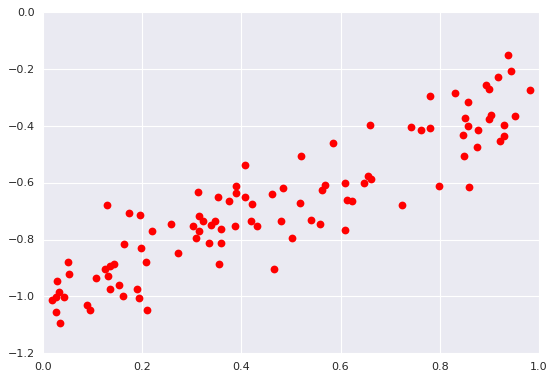

In [9]:
plt.figure(1)
plt.plot(x_train,t_train,'ro',label='Data')
plt.show()

In [10]:
#入力層
x = tf.placeholder(dtype=tf.float32,shape=(None,100),name="input")
t = tf.placeholder(dtype=tf.float32,shape=(None,100))
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
#出力層
#回帰問題では活性化関数は恒等関数(何も手を加えず出力する)
p = tf.multiply(x,w) + b

# 回帰問題には損失関数として2乗和誤差を使う
cross_entropy = tf.square(p - t)
loss = tf.reduce_mean(cross_entropy) / 2 

# Optimizer
# 勾配降下法 学習率0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

# トレーニング回数
train_step = 3000

In [11]:
### 学習の実行
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    i = 0
    for i in range(train_step):
        # トレーニング
        sess.run(train_op, feed_dict={x:x_train,t:t_train})
        # 200ステップごとに途中経過を表示
        if i % 200 == 0:
            loss_output = sess.run(loss, feed_dict={x:x_train, t:t_train})
            w_output = sess.run(w)
            b_output = sess.run(b)
            print "Step %i, cost %f, weight %f, bias %f" % (i, loss_output, w_output, b_output)

Step 0, cost 0.230880, weight -0.630529, bias 0.162368
Step 200, cost 0.010902, weight 0.336530, bias -0.819637
Step 400, cost 0.005080, weight 0.619976, bias -0.961974
Step 600, cost 0.004736, weight 0.688872, bias -0.996572
Step 800, cost 0.004716, weight 0.705619, bias -1.004982
Step 1000, cost 0.004715, weight 0.709689, bias -1.007025
Step 1200, cost 0.004715, weight 0.710679, bias -1.007522
Step 1400, cost 0.004715, weight 0.710918, bias -1.007643
Step 1600, cost 0.004715, weight 0.710977, bias -1.007672
Step 1800, cost 0.004715, weight 0.710990, bias -1.007678
Step 2000, cost 0.004715, weight 0.710990, bias -1.007678
Step 2200, cost 0.004715, weight 0.710990, bias -1.007678
Step 2400, cost 0.004715, weight 0.710990, bias -1.007678
Step 2600, cost 0.004715, weight 0.710990, bias -1.007678
Step 2800, cost 0.004715, weight 0.710990, bias -1.007678


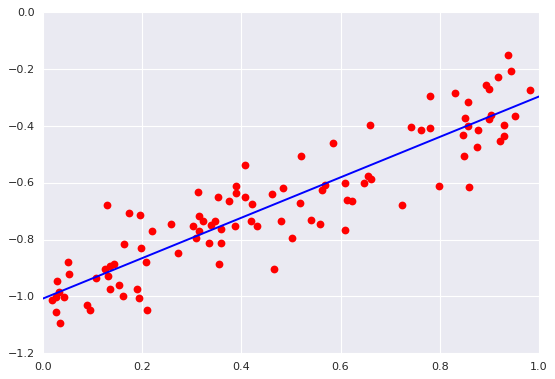

In [12]:
# 得られた w_outputとb_outputでグラフを表示する
x_line = np.linspace(0, 1.0, 100)
t_output = x_line * w_output + b_output
plt.figure()
plt.plot(x_train,t_train,'ro',label='Data')
plt.plot(x_line,t_output,'b-')
plt.show()

## 課題2 解答例
---
下記座標群から、最小二乗法による線形回帰（単回帰）を適用し、回帰係数と切片を求めなさい。  
また、そのプログラムをTensorFlowを使用し作成せよ

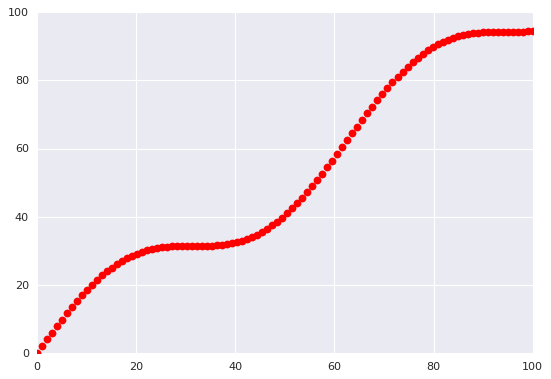

In [13]:
# coding:utf-8
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

x_train = np.linspace(0, 100, 100)
t_train = x_train + 10*np.sin(x_train/10)

plt.figure(1)
plt.plot(x_train, t_train, 'ro', label='Data')
plt.show()

In [14]:
x_train_reshape = x_train.reshape(1,100)
t_train_reshape = t_train.reshape(1,100)

In [15]:
#入力層
x = tf.placeholder(dtype=tf.float32,shape=(None,100),name="input")
t = tf.placeholder(dtype=tf.float32,shape=(None,100))
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
#出力層
#回帰問題では活性化関数は恒等関数(何も手を加えず出力する)
p = tf.multiply(x,w) + b

# 回帰問題には損失関数として2乗和誤差を使う
cross_entropy = tf.square(p - t)
loss = tf.reduce_mean(cross_entropy) / 2

# Optimizer
# 勾配降下法 学習率0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train_op = optimizer.minimize(loss)

# トレーニング回数
train_step = 3500

In [16]:
### 学習の実行
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    i = 0
    for i in range(train_step):
        # トレーニング
        sess.run(train_op, feed_dict={x:x_train_reshape,t:t_train_reshape})
        # 200ステップごとに途中経過を表示
        if i % 200 == 0:
            loss_output = sess.run(loss, feed_dict={x:x_train_reshape, t:t_train_reshape})
            w_output = sess.run(w)
            b_output = sess.run(b)
            print "Step %i, cost %f, weight %f, bias %f" % (i, loss_output, w_output, b_output)

Step 0, cost 2179.281494, weight -0.131117, bias 1.251978
Step 200, cost 22.207317, weight 1.003312, bias 1.275937
Step 400, cost 22.204880, weight 1.003208, bias 1.282929
Step 600, cost 22.202456, weight 1.003104, bias 1.289883
Step 800, cost 22.200066, weight 1.003000, bias 1.296805
Step 1000, cost 22.197695, weight 1.002898, bias 1.303687
Step 1200, cost 22.195349, weight 1.002795, bias 1.310539
Step 1400, cost 22.193027, weight 1.002694, bias 1.317352
Step 1600, cost 22.190727, weight 1.002593, bias 1.324134
Step 1800, cost 22.188448, weight 1.002492, bias 1.330880
Step 2000, cost 22.186195, weight 1.002392, bias 1.337592
Step 2200, cost 22.183975, weight 1.002292, bias 1.344271
Step 2400, cost 22.181757, weight 1.002193, bias 1.350914
Step 2600, cost 22.179565, weight 1.002094, bias 1.357526
Step 2800, cost 22.177404, weight 1.001996, bias 1.364102
Step 3000, cost 22.175274, weight 1.001898, bias 1.370646
Step 3200, cost 22.173145, weight 1.001801, bias 1.377158
Step 3400, cost 22

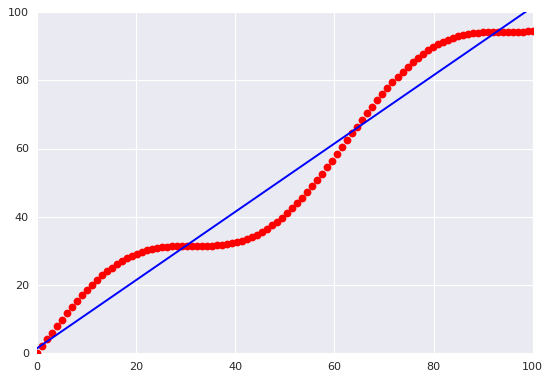

In [17]:
# 得られた w_outputとb_outputでグラフを表示する
t_output = x_train * w_output + b_output
plt.figure()
plt.ylim(0,100)
plt.plot(x_train,t_train,'ro',label='Data')
plt.plot(x_train,t_output,'b-')
plt.show()